In [141]:
## -- import packages needed -- ##

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
from IPython.display import HTML
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

In [143]:
## -- Setting plot parameters and theme for our plots -- ##

pd.set_option("display.max_columns", 6)
style.use("seaborn-ticks")

In [144]:
## -- importing data and looking at our unit of interest -- ##

cosponsorship = pd.read_csv('SCM_example_data.csv')
cosponsorship[['Year', 'cosponsorship','State_District_Code','Name']][cosponsorship['State_District_Code']=='NY14']

,Year,cosponsorship,State_District_Code,Name
288,2013,124,NY14,"CROWLEY, Joseph"
289,2014,229,NY14,"CROWLEY, Joseph"
290,2015,146,NY14,"CROWLEY, Joseph"
291,2016,255,NY14,"CROWLEY, Joseph"
292,2017,208,NY14,"CROWLEY, Joseph"
293,2018,328,NY14,"CROWLEY, Joseph"
294,2019,350,NY14,AOC
295,2020,528,NY14,AOC


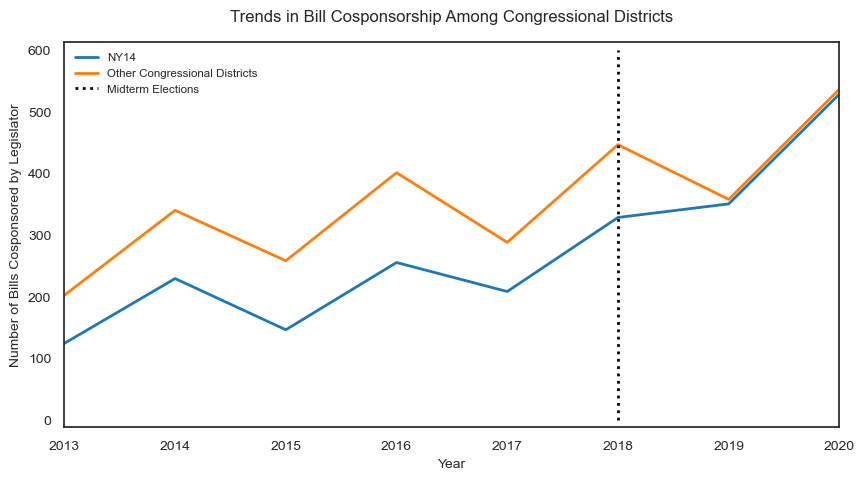

In [145]:
## -- Plotting Average Cosponsorship Trends b/w Treated and Non-Treated Congressional Districts -- ##

ax = plt.subplot(1, 1, 1)

(cosponsorship # calling df
 .assign(treatment = np.where(cosponsorship["treatment"], "NY14", "Other Congressional Districts"))
 .groupby(['Year','treatment']) # telling python to group by year and treatment dummy
 ['cosponsorship'] # calling cosponsorship variable
 .mean() # telling python to calculate the mean of cosponsorship per year
 .reset_index()
 .pivot('Year', "treatment", "cosponsorship") # placing year on index and placing treatment var on columns
 .plot(ax=ax, figsize=(10,5), lw=2, ls="-" ) # plotting averages between NY14 and mean of control pool districts
 )

plt.vlines(x=2018, ymin=0, ymax=600, linestyle=":", color = 'black', lw=2, label="Midterm Elections")
plt.ylabel("Number of Bills Cosponsored by Legislator")
plt.title("Trends in Bill Cosponsorship Among Congressional Districts", pad=15)
plt.margins(0,0.02)
plt.legend(fontsize='small')
plt.savefig('figure1.png', bbox_inches='tight', facecolor='White')

In [146]:
# Creating
pre_treatment_cosponsorship = []

for district in cosponsorship['State_District_Code']:
 pre_treatment_cosponsorship.append(np.mean(cosponsorship[(cosponsorship['State_District_Code'] == district) &
                                                          (cosponsorship['Year'] < 2019)]['cosponsorship']))

cosponsorship['pre-treat-cosp'] = pre_treatment_cosponsorship
cosponsorship

,Year,State_District_Code,District_ID,...,Group,treatment,pre-treat-cosp
0,2013,CA03,24,...,B,0,341.833333
1,2014,CA03,24,...,B,0,341.833333
2,2015,CA03,24,...,B,0,341.833333
3,2016,CA03,24,...,B,0,341.833333
4,2017,CA03,24,...,B,0,341.833333
...,...,...,...,...,...,...,...
291,2016,NY14,272,...,B,1,215.000000
292,2017,NY14,272,...,B,1,215.000000
293,2018,NY14,272,...,B,1,215.000000
294,2019,NY14,272,...,B,1,215.000000


In [147]:
# Transforming our df to wide format
features = ["dwn1", "leadership_score","prez_vote_d_2016","pre-treat-cosp"] # features used in model
#features = ['cosponsorship',"dwn1", "leadership_score","prez_vote_d_2016"] # features used in model

inverted = (cosponsorship[cosponsorship['Year'] < 2019] # filter pre-intervention period
            .pivot(index='State_District_Code', columns="Year")[features] # make one column per year and one row per district
            .T) # flip the table to have one column per district

inverted

State_District_Code          CA03        CA05        CA09  ...        WA10  \
                 Year                                      ...               
dwn1             2013   -0.309000   -0.395000   -0.263000  ...   -0.312000   
                 2014   -0.309000   -0.395000   -0.263000  ...   -0.312000   
                 2015   -0.309000   -0.395000   -0.263000  ...   -0.312000   
                 2016   -0.309000   -0.395000   -0.263000  ...   -0.312000   
                 2017   -0.309000   -0.395000   -0.263000  ...   -0.312000   
                 2018   -0.309000   -0.395000   -0.263000  ...   -0.312000   
leadership_score 2013    0.755902    0.521183    0.571752  ...    0.038298   
                 2014    0.744205    0.263011    0.819242  ...    0.494287   
                 2015    0.448147    0.685748    0.194680  ...    0.322074   
                 2016    0.805979    0.052298    0.270188  ...    0.311732   
                 2017    0.711222    0.266620    0.064816  ...    0.237171   
                 2018    0.723819    0.256624    0.313506  ...    0.425128   
prez_vote_d_2016 2013   52.991003   69.152145   56.559232  ...   51.251033   
                 2014   52.991003   69.152145   56.559232  ...   51.251033   
                 2015   52.991003   69.152145   56.559232  ...   51.251033   
                 2016   52.991003   69.152145   56.559232  ...   51.251033   
                 2017   52.991003   69.152145   56.559232  ...   51.251033   
                 2018   52.991003   69.152145   56.559232  ...   51.251033   
pre-treat-cosp   2013  341.833333  288.166667  265.166667  ...  238.666667   
                 2014  341.833333  288.166667  265.166667  ...  238.666667   
                 2015  341.833333  288.166667  265.166667  ...  238.666667   
                 2016  341.833333  288.166667  265.166667  ...  238.666667   
                 2017  341.833333  288.166667  265.166667  ...  238.666667   
                 2018  341.833333  288.166667  265.166667  ...  238.666667   

State_District_Code          WI02        WI03  
                 Year                          
dwn1             2013   -0.535000   -0.260000  
                 2014   -0.535000   -0.260000  
                 2015   -0.535000   -0.260000  
                 2016   -0.535000   -0.260000  
                 2017   -0.535000   -0.260000  
                 2018   -0.535000   -0.260000  
leadership_score 2013    0.566044    0.525456  
                 2014    0.520782    0.540392  
                 2015    0.569758    0.488174  
                 2016    0.529594    0.464304  
                 2017    0.549539    0.436816  
                 2018    0.535099    0.397815  
prez_vote_d_2016 2013   65.771567   44.777294  
                 2014   65.771567   44.777294  
                 2015   65.771567   44.777294  
                 2016   65.771567   44.777294  
                 2017   65.771567   44.777294  
                 2018   65.771567   44.777294  
pre-treat-cosp   2013  548.500000  323.833333  
                 2014  548.500000  323.833333  
                 2015  548.500000  323.833333  
                 2016  548.500000  323.833333  
                 2017  548.500000  323.833333  
                 2018  548.500000  323.833333  

[24 rows x 37 columns]

In [148]:
# Prepping our data by placing our NY14 as dependent var and the rest of the districts as control districts
y = inverted['NY14'].values # getting ny14
X = inverted.drop(columns='NY14').values # getting all other districts

In [149]:
from typing import List
from operator import add
from toolz import reduce, partial

# Defining the weight function used to construct better weights through interpolation
def loss_w(W, X, y) -> float:
    return np.sqrt(np.mean((y - X.dot(W))**2))

In [150]:
lambda x: np.sum(x) - 1

<function __main__.<lambda>(x)>

In [151]:
from scipy.optimize import fmin_slsqp

def get_w(X, y):

    w_start = [1/X.shape[1]]*X.shape[1]

    weights = fmin_slsqp(partial(loss_w, X=X, y=y),
                         np.array(w_start),
                         f_eqcons=lambda x: np.sum(x) - 1,
                         bounds=[(0.0, 1.0)]*len(w_start),
                         disp=False)
    return weights

In [152]:
# getting the weights now
ny14_weights = get_w(X, y)
print("Sum:", ny14_weights.sum())
print(np.round(ny14_weights, 4))

Sum: 1.0000000000426084
[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.4723 0.     0.     0.     0.
 0.     0.5277 0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.    ]


In [153]:
ny14_synth_scm = (cosponsorship[~(cosponsorship['State_District_Code'] == 'NY14')]
                 .pivot(index='Year', columns='State_District_Code')['cosponsorship']
                 .values.dot(ny14_weights))

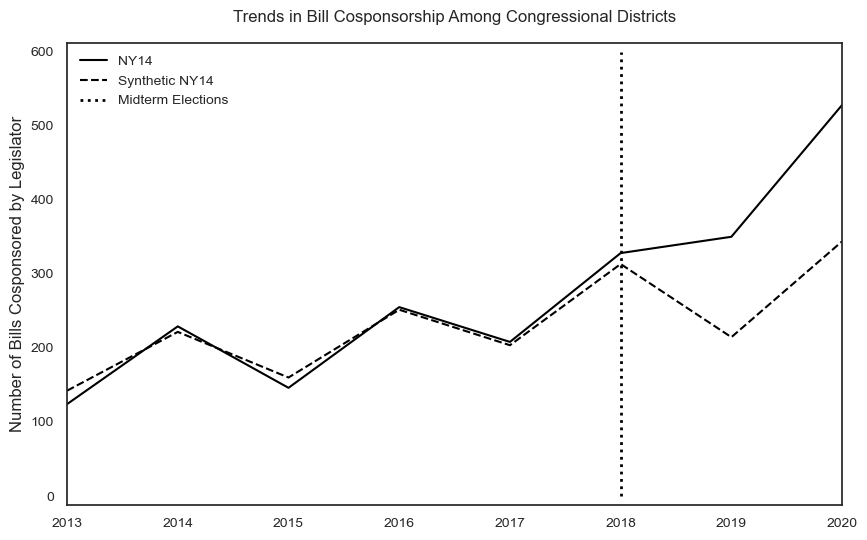

In [156]:
plt.figure(figsize=(10,6))
plt.plot(cosponsorship[cosponsorship['State_District_Code']=='NY14']['Year'],
         cosponsorship[cosponsorship['State_District_Code']=='NY14']['cosponsorship'],
         label="NY14",
         color='black')
plt.plot(cosponsorship[cosponsorship['State_District_Code']=='NY14']['Year'],
         ny14_synth_scm,
         label="Synthetic NY14",
         ls='--',
         color='black')
plt.vlines(x=2018, ymin=0, ymax=600, linestyle=":", color = 'black', lw=2, label="Midterm Elections")
plt.ylabel("Number of Bills Cosponsored by Legislator", fontsize='large')
plt.title("Trends in Bill Cosponsorship Among Congressional Districts", pad=15, fontsize='large')
plt.margins(0,0.02)
plt.legend(fontsize='medium', loc='upper left')
plt.savefig('figure2.png', bbox_inches='tight', facecolor='White')

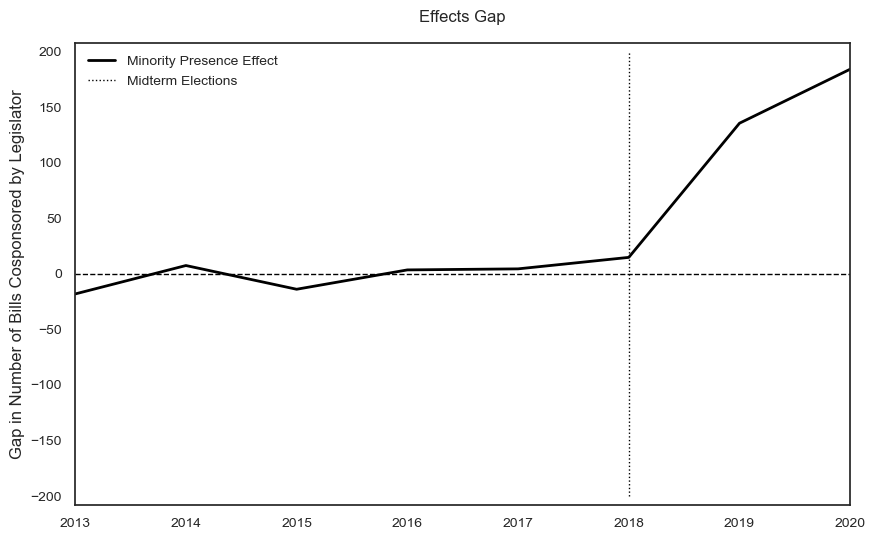

In [167]:
plt.figure(figsize=(10,6))
plt.plot(cosponsorship[cosponsorship['State_District_Code']=='NY14']['Year'],
cosponsorship[cosponsorship['State_District_Code']=='NY14']['cosponsorship'] - ny14_synth_scm,
         label="Minority Presence Effect",
         lw=2, color='black')
plt.vlines(x=2018, ymin=-200, ymax=200, linestyle=":", lw=1, label="Midterm Elections", color='black')
plt.hlines(y=0, xmin=2013, xmax=2020, lw=1, color='black', linestyles='--')
plt.title("Effects Gap", pad=15, fontsize='large')
plt.ylabel("Gap in Number of Bills Cosponsored by Legislator", fontsize='large')
plt.margins(0,0.02)
plt.legend(fontsize='medium', loc='upper left');

# Synthetic Controls

In [169]:
#pip install SyntheticControlMethods

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.8/932.8 kB 11.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.4/252.4 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 17.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.1/102.1 kB 12.3 MB/s eta 0:00:00
  Created wheel for SyntheticControlMethods: filename=SyntheticControlMethods-1.1.17-py2.py3-none-any.whl size=27887 sha256=404ea05ff104cbd385b4f80f4b0b97107cfdbc580565fa98950000bd84de284e
  Stored in directory: /Users/josealcocer/Library/Caches/pip/wheels/9d/a6/4c/97499a9ddc507785a6abba8d862f3b9ec818f4909863499ddc
Successfully built SyntheticControlMethods
Note: you may need to restart the kernel to use updated packages.


In [170]:
import pandas as pd
import numpy as np
from SyntheticControlMethods import Synth, DiffSynth

In [ ]:
## -- importing data and looking at our unit of interest -- ##

cosponsorship = pd.read_csv('SCM_example_data.csv')
cosponsorship[['Year', 'cosponsorship','State_District_Code','Name']][cosponsorship['State_District_Code']=='NY14']